# Recommender Systems with Collaborative Filtering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
rating_df=pd.read_csv('C:\\Users\\DELL\\Desktop\\vtr\\Recom\\ml-latest-small\\ratings.csv')
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
# Timestamp column is not required for finding similarity.

rating_df.drop(['timestamp'],axis=1,inplace=True)

In [4]:
rating_df.shape

(100836, 3)

In [5]:
movies_df=pd.read_csv('C:\\Users\\DELL\\Desktop\\vtr\\Recom\\ml-latest-small\\movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# Merging rating_df and movies_df based on movieId with left join 

fin_df=rating_df.merge(movies_df, on='movieId',how='left')
fin_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [7]:
top_mov=fin_df['title'].value_counts()[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Forrest Gump (1994)'),
  Text(1, 0, 'Shawshank Redemption, The (1994)'),
  Text(2, 0, 'Pulp Fiction (1994)'),
  Text(3, 0, 'Silence of the Lambs, The (1991)'),
  Text(4, 0, 'Matrix, The (1999)'),
  Text(5, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(6, 0, 'Jurassic Park (1993)'),
  Text(7, 0, 'Braveheart (1995)'),
  Text(8, 0, 'Terminator 2: Judgment Day (1991)'),
  Text(9, 0, "Schindler's List (1993)")])

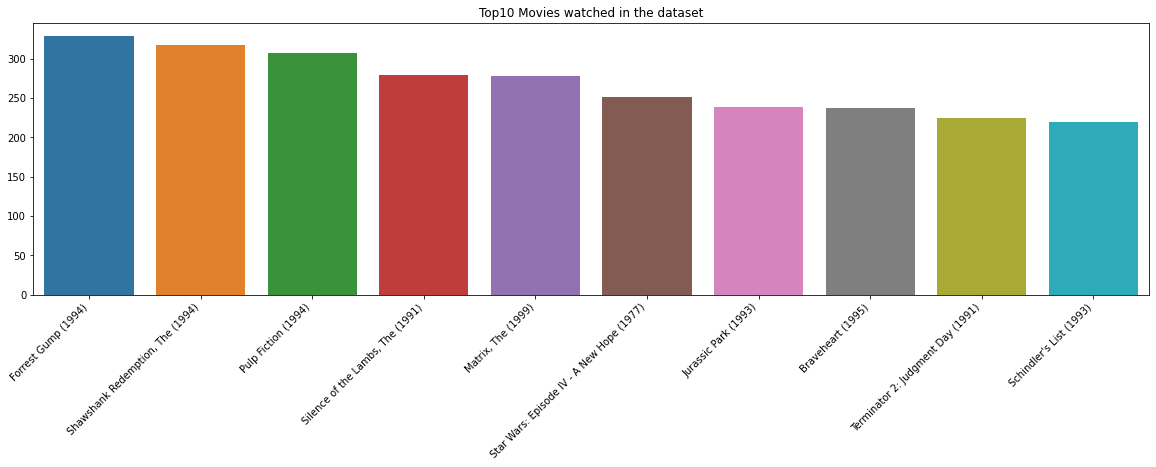

In [8]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x=top_mov.index, y=top_mov.values).set(title='Top10 Movies watched in the dataset')
plt.xticks(rotation = 45, ha = 'right')

In [9]:
# Timestamp and title columns are not required for finding similarity.

fin_df.drop(['title'],axis=1,inplace=True)

## Data Cleaning

In [10]:
def get_genre1(x):
    genres1 = x.split('|')
    if genres1 == []:
        return np.NaN
    else:
        return (genres1[0])

In [11]:
def get_genre2(x):
    genres2 = x.split('|')
    if len(genres2)<2:
        return np.NaN
    else:
        return (genres2[1])

In [12]:
def get_genre3(x):
    genres3 = x.split('|')
    if len(genres3)<3:
        return np.NaN
    else:
        return (genres3[2])

In [13]:
fin_df['genre_1'] = fin_df['genres'].map(lambda x: get_genre1(x))
fin_df['genre_2'] = fin_df['genres'].map(lambda x: get_genre2(x))
fin_df['genre_3'] = fin_df['genres'].map(lambda x: get_genre3(x))

The above 3 functions converts genres column into 3 sub-columns.

In [14]:
fin_df.head()

,userId,movieId,rating,genres,genre_1,genre_2,genre_3
0,1,1,4.0,Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children
1,1,3,4.0,Comedy|Romance,Comedy,Romance,NaN
2,1,6,4.0,Action|Crime|Thriller,Action,Crime,Thriller
3,1,47,5.0,Mystery|Thriller,Mystery,Thriller,NaN
4,1,50,5.0,Crime|Mystery|Thriller,Crime,Mystery,Thriller


In [15]:
# Droping genres column.

fin_df.drop(['genres'],axis=1,inplace=True)

In [16]:
fin_df.head()

,userId,movieId,rating,genre_1,genre_2,genre_3
0,1,1,4.0,Adventure,Animation,Children
1,1,3,4.0,Comedy,Romance,NaN
2,1,6,4.0,Action,Crime,Thriller
3,1,47,5.0,Mystery,Thriller,NaN
4,1,50,5.0,Crime,Mystery,Thriller


In [17]:
# No. of unique users
len(fin_df['userId'].unique())

610

In [18]:
# No. of unique movies
len(fin_df['movieId'].unique())

9724

In [19]:
fin_df['genre_1'].unique()

array(['Adventure', 'Comedy', 'Action', 'Mystery', 'Crime', 'Thriller',
       'Drama', 'Animation', 'Children', 'Horror', 'Documentary',
       'Sci-Fi', 'Fantasy', 'Film-Noir', 'Western', 'Musical', 'Romance',
       '(no genres listed)', 'War'], dtype=object)

In [20]:
fin_df['genre_2'].unique()

array(['Animation', 'Romance', 'Crime', 'Thriller', 'Mystery', 'Comedy',
       'Drama', 'War', nan, 'Adventure', 'Children', 'Horror', 'Fantasy',
       'Sci-Fi', 'Musical', 'Film-Noir', 'Western', 'Documentary', 'IMAX'],
      dtype=object)

In [21]:
fin_df['genre_3'].unique()

array(['Children', nan, 'Thriller', 'Horror', 'Crime', 'War', 'Romance',
       'Western', 'Sci-Fi', 'Drama', 'Comedy', 'Fantasy', 'Mystery',
       'Musical', 'Film-Noir', 'IMAX', 'Animation', 'Documentary'],
      dtype=object)

In [22]:
# Replacing unknown values in genre columns into NaN

fin_df['genre_1'] = fin_df['genre_1'].replace('(no genres listed)',np.NaN)
fin_df['genre_2'] = fin_df['genre_2'].replace('genres',np.NaN)
fin_df['genre_3'] = fin_df['genre_3'].replace('listed)',np.NaN)

In [23]:
# Replacing NaN values into '0'

fin_df['genre_1'] = fin_df['genre_1'].replace(np.NaN,'0')
fin_df['genre_2'] = fin_df['genre_2'].replace(np.NaN,'0')
fin_df['genre_3'] = fin_df['genre_3'].replace(np.NaN,'0')

In [24]:
# Taking all the unique values present in 'genre_1', 'genre_2','genre_3' columns into a list.

uni_genres=np.unique(fin_df[['genre_1', 'genre_2','genre_3']].values)
uni_genres=uni_genres.tolist()
uni_genres

['0',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [25]:
def get_gen(x,uni_genres):
    for i in uni_genres:
        if x==i:
            t=float(uni_genres.index(i))
            return t
        else:
            continue

In [26]:
fin_df['genre_1'] = fin_df['genre_1'].map(lambda x: get_gen(x,uni_genres))
fin_df['genre_2'] = fin_df['genre_2'].map(lambda x: get_gen(x,uni_genres))
fin_df['genre_3'] = fin_df['genre_3'].map(lambda x: get_gen(x,uni_genres))

The get_gen function does encoding to the string values present in 'genre_1', 'genre_2','genre_3' columns.

In [27]:
fin_df.head()

,userId,movieId,rating,genre_1,genre_2,genre_3
0,1,1,4.0,2.0,3.0,4.0
1,1,3,4.0,5.0,15.0,0.0
2,1,6,4.0,1.0,6.0,17.0
3,1,47,5.0,14.0,17.0,0.0
4,1,50,5.0,6.0,14.0,17.0


## User Based Similarity

In [28]:
# No. of unique users
len(fin_df['userId'].unique())

610

In [29]:
# No. of unique users
len(fin_df['movieId'].unique())

9724

We need to create a pivot table or matrix and represent users as rows and movies as columns. The values of the matrix will be the ratings the users have given to those movies and genre of the specific movie. As there are 610 users and 9724 movies, we will have matrix of size of 610 X 9066.

Those movies that the users have not watched and rated yet, will be represented by NaN.

In [30]:
user_movies_df1=fin_df.pivot(index='userId',
                              columns='movieId',
                              values=['rating','genre_1','genre_2','genre_3']).reset_index(drop=True)
user_movies_df1.head()

rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
0          4.0    NaN    4.0    NaN    NaN    4.0    NaN    NaN    NaN    NaN   
1          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4          4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         ... genre_3                                                          \
movieId  ...  193565 193567 193571 193573 193579 193581 193583 193585 193587   
0        ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1        ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                
movieId 193609  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 38896 columns]

In [31]:
# Converting index of user_movies_df as same as rating_df

user_movies_df1.index=rating_df.userId.unique()
user_movies_df1.head()

rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
1          4.0    NaN    4.0    NaN    NaN    4.0    NaN    NaN    NaN    NaN   
2          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5          4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         ... genre_3                                                          \
movieId  ...  193565 193567 193571 193573 193579 193581 193583 193585 193587   
1        ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5        ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                
movieId 193609  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  

[5 rows x 38896 columns]

In [32]:
# The NaN values should be replaced with 0.
user_movies_df1.fillna(0, inplace=True)
user_movies_df1.head()

rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
1          4.0    0.0    4.0    0.0    0.0    4.0    0.0    0.0    0.0    0.0   
2          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5          4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         ... genre_3                                                          \
movieId  ...  193565 193567 193571 193573 193579 193581 193583 193585 193587   
1        ...     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        ...     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        ...     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        ...     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5        ...     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                
movieId 193609  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
5          0.0  

[5 rows x 38896 columns]

## Calculating Cosine Similarity between users

Each row in user_movies_df represents a user. If we compute the similarity between rows, it will represent the similarity between the users. We will be using cosine similarity for finding similarity.

In [33]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

user_simi=1-pairwise_distances(user_movies_df1.values,
                              metric='cosine')
# Store the results in DataFrame
user_simi_df1=pd.DataFrame(user_simi)
user_simi_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,1.000000,0.007315,0.058236,0.180631,0.153538,0.150644,0.166186,0.176629,0.041509,0.036841,...,0.084934,0.195699,0.254270,0.085130,0.146279,0.177394,0.315012,0.312850,0.104193,0.137020
1,0.007315,1.000000,0.000000,0.016446,0.014162,0.007855,0.037672,0.012934,0.000000,0.056090,...,0.255251,0.007944,0.010540,0.000000,0.000000,0.030780,0.006770,0.029472,0.014352,0.100715
2,0.058236,0.000000,1.000000,0.012160,0.042265,0.022820,0.000000,0.036589,0.000000,0.000000,...,0.049347,0.028372,0.052220,0.000000,0.004968,0.035233,0.050681,0.041237,0.000000,0.035822
3,0.180631,0.016446,0.012160,1.000000,0.122321,0.121868,0.132487,0.128690,0.000885,0.055148,...,0.121594,0.161865,0.328525,0.079211,0.042649,0.222434,0.167512,0.176645,0.035248,0.105436
4,0.153538,0.014162,0.042265,0.122321,1.000000,0.312039,0.104361,0.428805,0.000000,0.025609,...,0.077207,0.394805,0.130363,0.191799,0.123908,0.120480,0.144719,0.143042,0.264438,0.053109


In [34]:
# Setting the index and column names to user ids
user_simi_df1.index= rating_df.userId.unique()
user_simi_df1.columns= rating_df.userId.unique()
user_simi_df1.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.000000,0.007315,0.058236,0.180631,0.153538,0.150644,0.166186,0.176629,0.041509,0.036841,...,0.084934,0.195699,0.254270,0.085130,0.146279,0.177394,0.315012,0.312850,0.104193,0.137020
2,0.007315,1.000000,0.000000,0.016446,0.014162,0.007855,0.037672,0.012934,0.000000,0.056090,...,0.255251,0.007944,0.010540,0.000000,0.000000,0.030780,0.006770,0.029472,0.014352,0.100715
3,0.058236,0.000000,1.000000,0.012160,0.042265,0.022820,0.000000,0.036589,0.000000,0.000000,...,0.049347,0.028372,0.052220,0.000000,0.004968,0.035233,0.050681,0.041237,0.000000,0.035822
4,0.180631,0.016446,0.012160,1.000000,0.122321,0.121868,0.132487,0.128690,0.000885,0.055148,...,0.121594,0.161865,0.328525,0.079211,0.042649,0.222434,0.167512,0.176645,0.035248,0.105436
5,0.153538,0.014162,0.042265,0.122321,1.000000,0.312039,0.104361,0.428805,0.000000,0.025609,...,0.077207,0.394805,0.130363,0.191799,0.123908,0.120480,0.144719,0.143042,0.264438,0.053109


In [35]:
user_simi_df1.shape

(610, 610)

user_simi_df shows that it contains the cosine similarity between all possible pairs of users and each cell represents the cosine similarity between two specific users. The diagonal of the matrix shows the similarity of an user with itself(i.e. 1.0) because each user is similar to himself. But we need the algorithm to find other users who are similar to a specific user. So, we will set the diagonal values as 0.0.

In [36]:
np.fill_diagonal( user_simi, 0)
user_simi_df1.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,0.000000,0.007315,0.058236,0.180631,0.153538,0.150644,0.166186,0.176629,0.041509,0.036841,...,0.084934,0.195699,0.254270,0.085130,0.146279,0.177394,0.315012,0.312850,0.104193,0.137020
2,0.007315,0.000000,0.000000,0.016446,0.014162,0.007855,0.037672,0.012934,0.000000,0.056090,...,0.255251,0.007944,0.010540,0.000000,0.000000,0.030780,0.006770,0.029472,0.014352,0.100715
3,0.058236,0.000000,0.000000,0.012160,0.042265,0.022820,0.000000,0.036589,0.000000,0.000000,...,0.049347,0.028372,0.052220,0.000000,0.004968,0.035233,0.050681,0.041237,0.000000,0.035822
4,0.180631,0.016446,0.012160,0.000000,0.122321,0.121868,0.132487,0.128690,0.000885,0.055148,...,0.121594,0.161865,0.328525,0.079211,0.042649,0.222434,0.167512,0.176645,0.035248,0.105436
5,0.153538,0.014162,0.042265,0.122321,0.000000,0.312039,0.104361,0.428805,0.000000,0.025609,...,0.077207,0.394805,0.130363,0.191799,0.123908,0.120480,0.144719,0.143042,0.264438,0.053109


## Filtering Similar Users

To find most similar users, the maximum values of each column or row can be filtered.

In [37]:
user_simi_df1.idxmax(axis=0)[0:10]

1     452
2     366
3     278
4     391
5     470
6     181
7     354
8     347
9     508
10    563
dtype: int64

The above output shows user 452 is most similar to user 1, user 366 is most similar to user 2 and so on. This can be explained through verification that the 2 users have watched several similar type of movies in common and rated them similarily.

In [38]:
user_simi_df1.nlargest(5,[2])

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
366,0.077641,0.313100,0.007747,0.005580,0.079274,0.030132,0.092337,0.040829,0.015852,0.096658,...,0.305253,0.042901,0.046688,0.029724,0.077981,0.087828,0.076577,0.118544,0.077723,0.142618
378,0.052595,0.309554,0.044412,0.049858,0.071197,0.042760,0.100878,0.088587,0.019846,0.091147,...,0.447190,0.060223,0.057091,0.034321,0.029940,0.087097,0.063454,0.090492,0.015450,0.169397
417,0.144423,0.305385,0.005036,0.135850,0.020184,0.054539,0.103041,0.103060,0.017109,0.175397,...,0.288026,0.077556,0.116124,0.046178,0.034053,0.153672,0.102080,0.189119,0.070091,0.163718
461,0.146573,0.295961,0.047116,0.145008,0.098124,0.121529,0.142107,0.277538,0.000000,0.117666,...,0.263444,0.170885,0.106978,0.055579,0.059748,0.094501,0.187325,0.134685,0.120138,0.115587
247,0.205652,0.294845,0.025367,0.166878,0.132820,0.103589,0.231601,0.203752,0.072470,0.177027,...,0.533394,0.149730,0.133324,0.072169,0.151731,0.208931,0.176739,0.232413,0.099130,0.262644


user 366, 378, 417, 461, 247 are the top5 most similar users to user2.

## Finding common movies of Similar Users

In [39]:
def get_user_similar_mov(user1, user2):
    # Inner join between movies watched between two users will give the common movies watched.
    common_movies=rating_df[rating_df['userId']==user1].merge(rating_df[rating_df['userId']==user2],
                                                             on='movieId',
                                                             how='inner')
    # Join the above result with movie details
    return common_movies.merge(movies_df, on='movieId')

In [40]:
# To find common movies between user 2 and user 366

common_mov=get_user_similar_mov(2,366)
common_mov.head()

,userId_x,movieId,rating_x,userId_y,rating_y,title,genres
0,2,3578,4.0,366,4.5,Gladiator (2000),Action|Adventure|Drama
1,2,6874,4.0,366,4.0,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
2,2,48516,4.0,366,4.5,"Departed, The (2006)",Crime|Drama|Thriller
3,2,58559,4.5,366,4.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
4,2,68157,4.5,366,4.5,Inglourious Basterds (2009),Action|Drama|War


From the above common 5 movies between user 2 and user 366, we can also infer that they both like watching Action, Crime and Drama movies. 

In [41]:
# To find common movies between user 5 and user 470.

common_mov=get_user_similar_mov(5,470)
common_mov.head()

,userId_x,movieId,rating_x,userId_y,rating_y,title,genres
0,5,1,4.0,470,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,21,4.0,470,3.0,Get Shorty (1995),Comedy|Crime|Thriller
2,5,34,4.0,470,4.0,Babe (1995),Children|Drama
3,5,36,4.0,470,4.0,Dead Man Walking (1995),Crime|Drama
4,5,39,3.0,470,3.0,Clueless (1995),Comedy|Romance


From the above common 5 movies between user 5 and user 470, we can also infer that they both like watching Comedy, Crime and Drama movies.

Finding user similarity does not work for new users. We need to wait until the new user buys a few items and rates them. This can be overcome by item_based similarity. It is based on the notion that if 2 items have been bought by many users and rated similarly, then there must be some inherent relationship between these two items. In future, we can infer that if a user watches one of these 2 movies, he or she will most likely watches the other movie.

## Item based Similarity

In [42]:
user_movies_df2=fin_df.pivot(index='movieId',
                              columns='userId',
                              values=['rating']).reset_index(drop=True)
# Fill all NaNs with 0
user_movies_df2.fillna(0,inplace=True)

# Finding cosine between movies
movie_sim=1-pairwise_distances(user_movies_df2.values,
                              metric='cosine')
movie_sim_df=pd.DataFrame(movie_sim)

In [43]:
movie_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Filling the diagonal with 0, as it represents the auto correlation of movies

np.fill_diagonal( movie_sim, 0)
movie_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.410562,0.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.296917,0.282438,0.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035573,0.106415,0.092406,0.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.308762,0.287795,0.417802,0.188376,0.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
movie_sim_df.shape

(9724, 9724)

## Finding Most Similar Movies

In [46]:
def get_similar_movies(movieid, topN=5):
    # Get the index of the movie record in movies_df
    movieidx=movies_df[movies_df.movieId==movieid].index[0]
    movies_df['similarity']=movie_sim_df.iloc[movieidx]
    top_n=movies_df.sort_values(['similarity'],ascending=False)[0:topN]
    return top_n

In [48]:
movies_df[movies_df.movieId==231]

,movieId,title,genres,similarity
197,231,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy,0.147768


In [50]:
get_similar_movies(231)

,movieId,title,genres,similarity
302,344,Ace Ventura: Pet Detective (1994),Comedy,0.670194
138,165,Die Hard: With a Vengeance (1995),Action|Crime|Thriller,0.575156
337,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,0.550168
126,153,Batman Forever (1995),Action|Adventure|Comedy|Crime,0.544826
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,0.539576


It can be observed that the movie Dumb & Dumber is an Adventure and Comedy movie, the similar movies we got also of the similar Genre.

## Conclusion

Recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.